# MBA Admission Targeting

### Setup

In [49]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import random
import xgboost as xgb
import graphviz
from graphviz import Source, Digraph
from sklearn.pipeline import Pipeline

In [2]:
# Define the folder path
path = "C://Users//roryq//Downloads//MQE_Data//"  # Replace with your actual folder path

# Input and output file names
input_file = f"{path}MBA.csv"

df = pd.read_csv(input_file, low_memory=False)

# Set a global seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

### Data Exploration

+ Figure out how target variable is encoded
+ Check for missing values
+ See data types in the dataframe
+ Data distributions and correlations

In [3]:
# View data
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No


In [4]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

# To handle NaN values in the missing percentage (e.g., if a column is entirely NaN)
missing_percentage = missing_percentage.fillna(0)

print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Person ID                         0.0
Age                               0.0
Gender                            0.0
Undergraduate Major               0.0
Undergraduate GPA                 0.0
Years of Work Experience          0.0
Current Job Title                 0.0
Annual Salary (Before MBA)        0.0
Has Management Experience         0.0
GRE/GMAT Score                    0.0
Undergrad University Ranking      0.0
Entrepreneurial Interest          0.0
Networking Importance             0.0
MBA Funding Source                0.0
Desired Post-MBA Role             0.0
Expected Post-MBA Salary          0.0
Location Preference (Post-MBA)    0.0
Reason for MBA                    0.0
Online vs. On-Campus MBA          0.0
Decided to Pursue MBA?            0.0
dtype: float64


In [5]:
#  Inspect and explore categorical (or string) columns
# Loop through columns with dtype 'object' (categorical columns)
for col in df.select_dtypes(include='object'):
    print(df[col].unique())

['Male' 'Female' 'Other']
['Arts' 'Business' 'Engineering' 'Economics' 'Science']
['Entrepreneur' 'Analyst' 'Engineer' 'Manager' 'Consultant']
['No' 'Yes']
['Loan' 'Scholarship' 'Self-funded' 'Employer']
['Finance Manager' 'Startup Founder' 'Consultant' 'Marketing Director'
 'Executive']
['International' 'Domestic']
['Entrepreneurship' 'Career Growth' 'Skill Enhancement' 'Networking']
['On-Campus' 'Online']
['Yes' 'No']


In [6]:
df['Decided to Pursue MBA?'].value_counts()

Decided to Pursue MBA?
Yes    5907
No     4093
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5073
Female    4460
Other      467
Name: count, dtype: int64

In [8]:
# Count observations based on gender and MBA pursuit decision
gender_mba_counts = df.groupby(["Decided to Pursue MBA?","Gender"]).size().reset_index(name="Count")

# Display results
print(gender_mba_counts)

  Decided to Pursue MBA?  Gender  Count
0                     No  Female   1817
1                     No    Male   2090
2                     No   Other    186
3                    Yes  Female   2643
4                    Yes    Male   2983
5                    Yes   Other    281


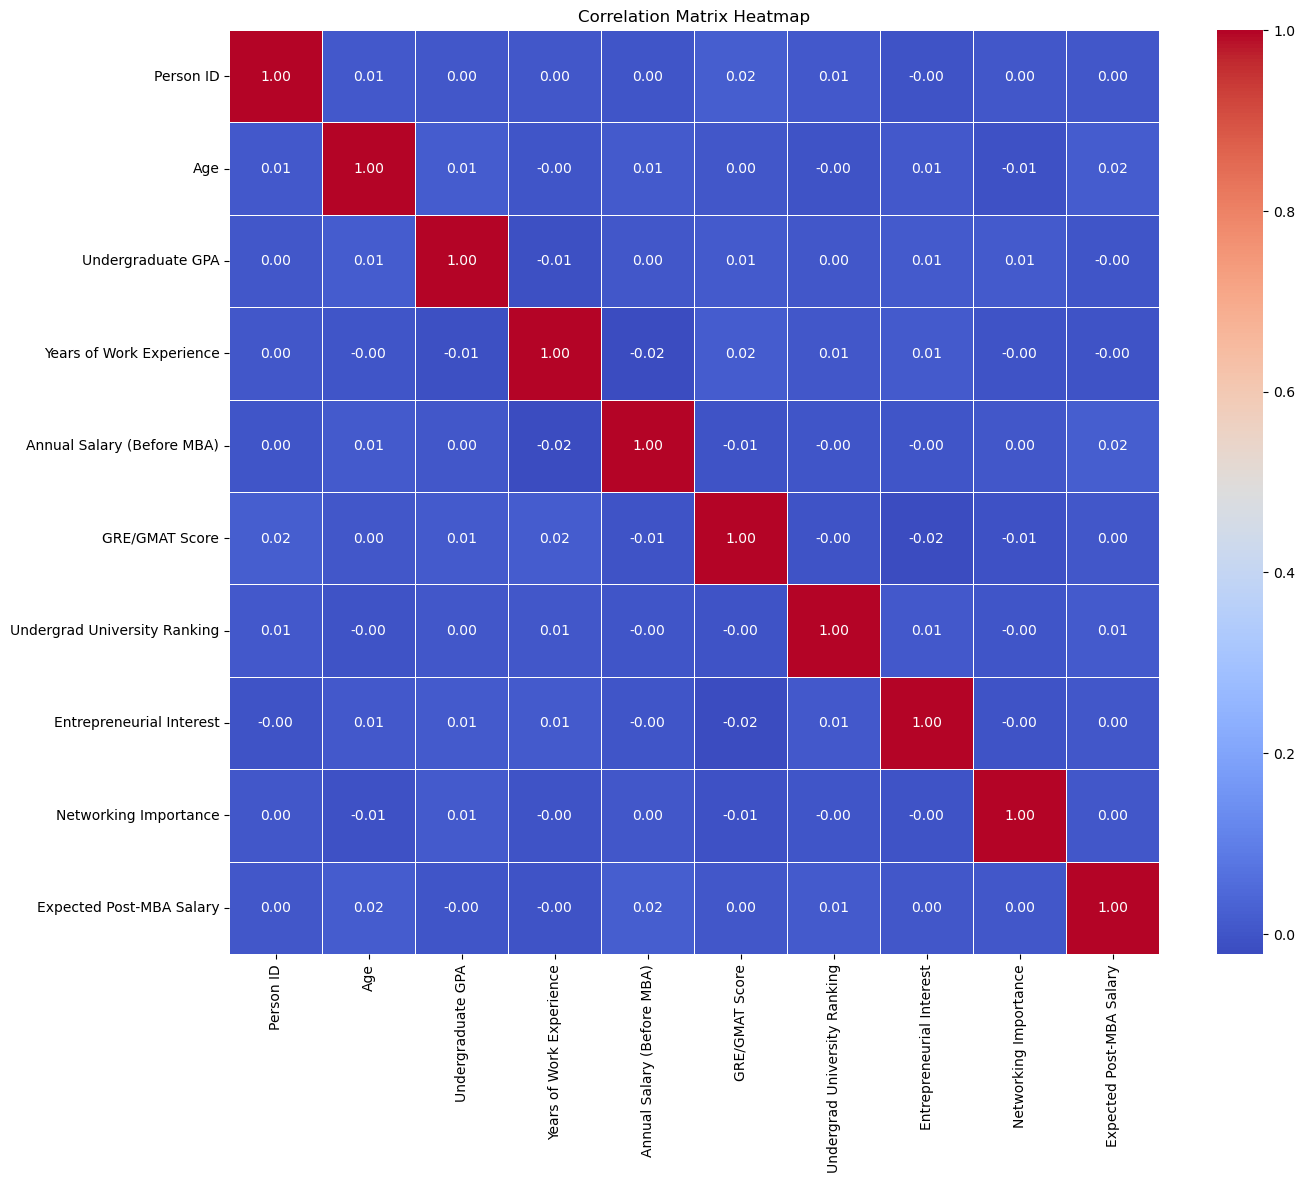

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
# Compute Correlation Matrix (Only for Numerical Features)
correlation_matrix = df.corr(method='spearman',numeric_only=True)
# Plot Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

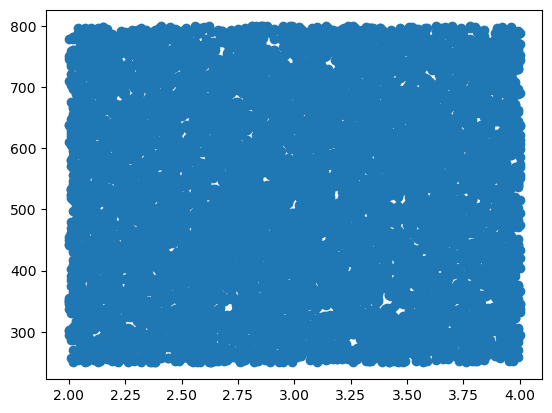

In [10]:

plt.scatter(df['Undergraduate GPA'], df['GRE/GMAT Score'])

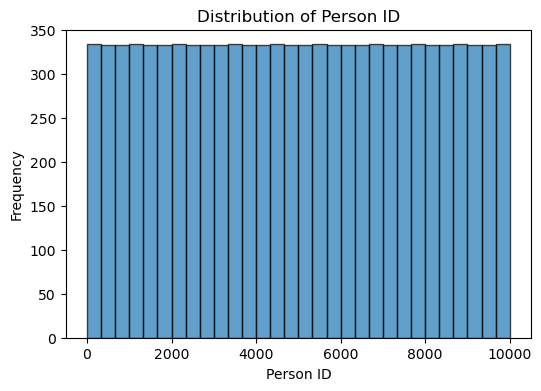

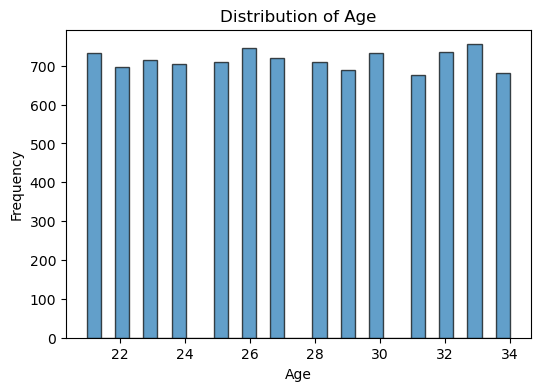

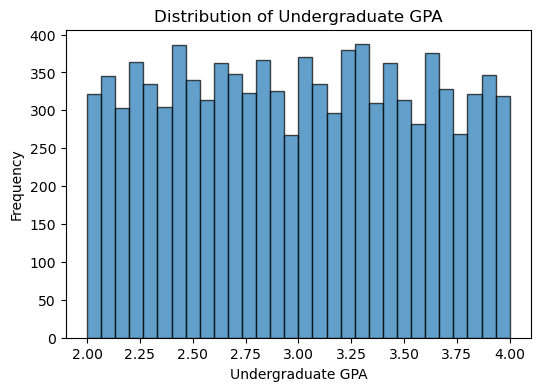

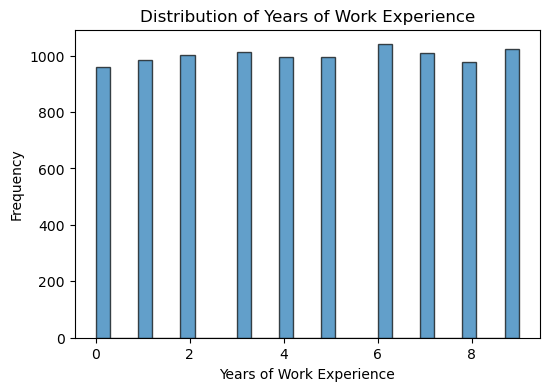

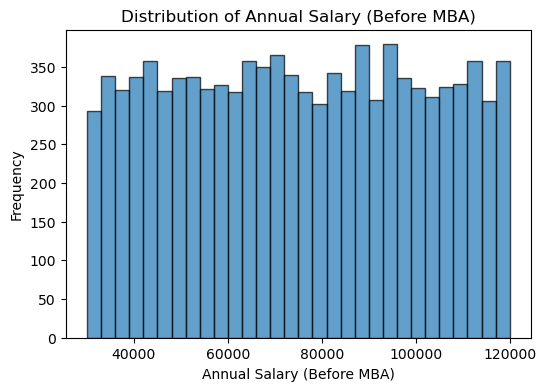

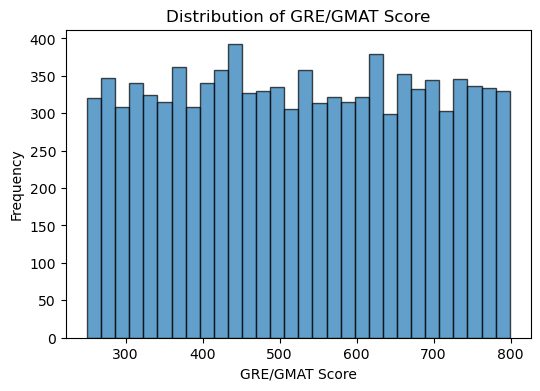

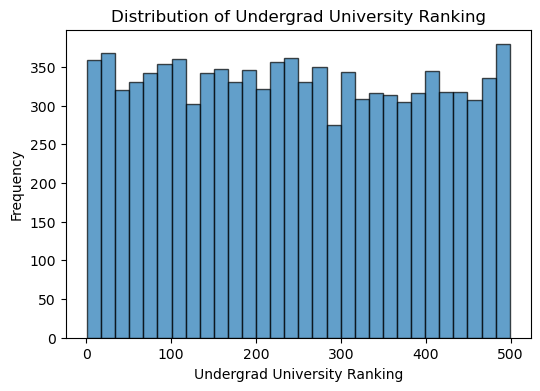

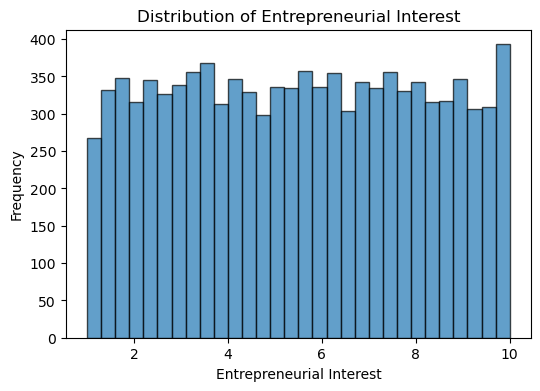

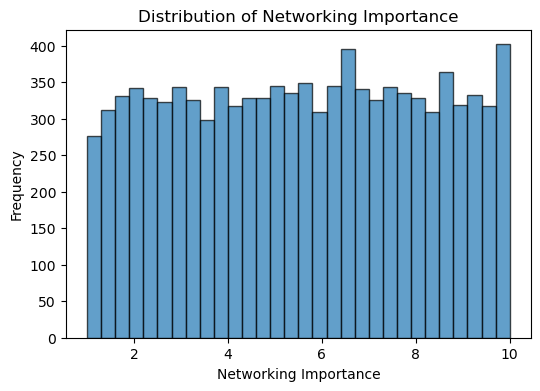

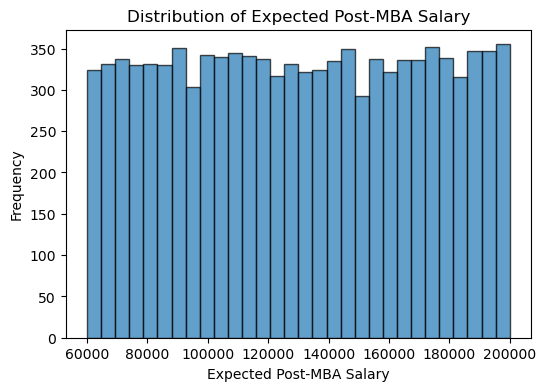

In [11]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Modeling

#### Regularized Regression with Optimization

In [12]:
y = df['Decided to Pursue MBA?']
data1 = pd.get_dummies(df.drop('Decided to Pursue MBA?', axis=1),dtype=int)

In [13]:
# Create features and target to specifcy for the rest of models in the part
# Target is adaptability level
# Features are all other variables in the data set specified in read me file
features = data1
target = y

# Standardize all features of the data with standard scaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Handle class imbalance (if needed)
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(features_standardized, target)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=100)

# Feature Selection (Remove unnecessary features)
log_reg = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # Keep top 10 features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train optimized logistic regression model
logistic_regression = LogisticRegressionCV(
    cv=5, solver='lbfgs', multi_class='multinomial',
    penalty='l2', Cs=50,  # Increased Cs for finer tuning
    class_weight='balanced',  # Handles imbalance better
    random_state=100, n_jobs=-1
)

# Create model with out logistics regression specifications
model_cv = logistic_regression.fit(X_train, y_train)

# Predictions of our model for out test data
y_pred_cv = model_cv.predict(X_test)



# Find accuracy
#create confusion matrix with accuracy for test and predicted values from model
accuracy = accuracy_score(y_test,y_pred_cv)
report = classification_report(y_pred_cv, y_test)
cm = confusion_matrix(y_test, y_pred_cv)

print("Classification report:")

print(report)
print("Accuracy: ",accuracy)
print("  ")
print("Confusion matrix:")
print(cm)

Classification report:
              precision    recall  f1-score   support

          No       0.51      0.52      0.52      1198
         Yes       0.50      0.50      0.50      1165

    accuracy                           0.51      2363
   macro avg       0.51      0.51      0.51      2363
weighted avg       0.51      0.51      0.51      2363

Accuracy:  0.5069826491747779
  
Confusion matrix:
[[619 586]
 [579 579]]


#### Decision Tree

In [14]:
X = features

# Specify train and test split and x and y for model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100, test_size=.2)

##### No Restraints

In [15]:
# Create tree params
tree_clf5 = DecisionTreeClassifier(random_state=100)

# Train model
tree_clf5.fit(X_train,y_train)

# Create predictions from model with test data
ypred=tree_clf5.predict(X_test)

# Find accuracy
#create confusion matrix with accuracy for test and predicted values from model
accuracy = accuracy_score(y_test,ypred)
report = classification_report(ypred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")

print(report)
print("Accuracy: ",accuracy)
print("  ")
print("Confusion matrix:")
print(cm)

Classification report:
              precision    recall  f1-score   support

          No       0.42      0.44      0.43       824
         Yes       0.60      0.58      0.59      1176

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.53      0.52      0.52      2000

Accuracy:  0.5235
  
Confusion matrix:
[[360 489]
 [464 687]]


In [16]:
# Get feature importance scores from the trained Decision Tree model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_clf5.feature_importances_
}).sort_values(by='Importance', ascending=False)


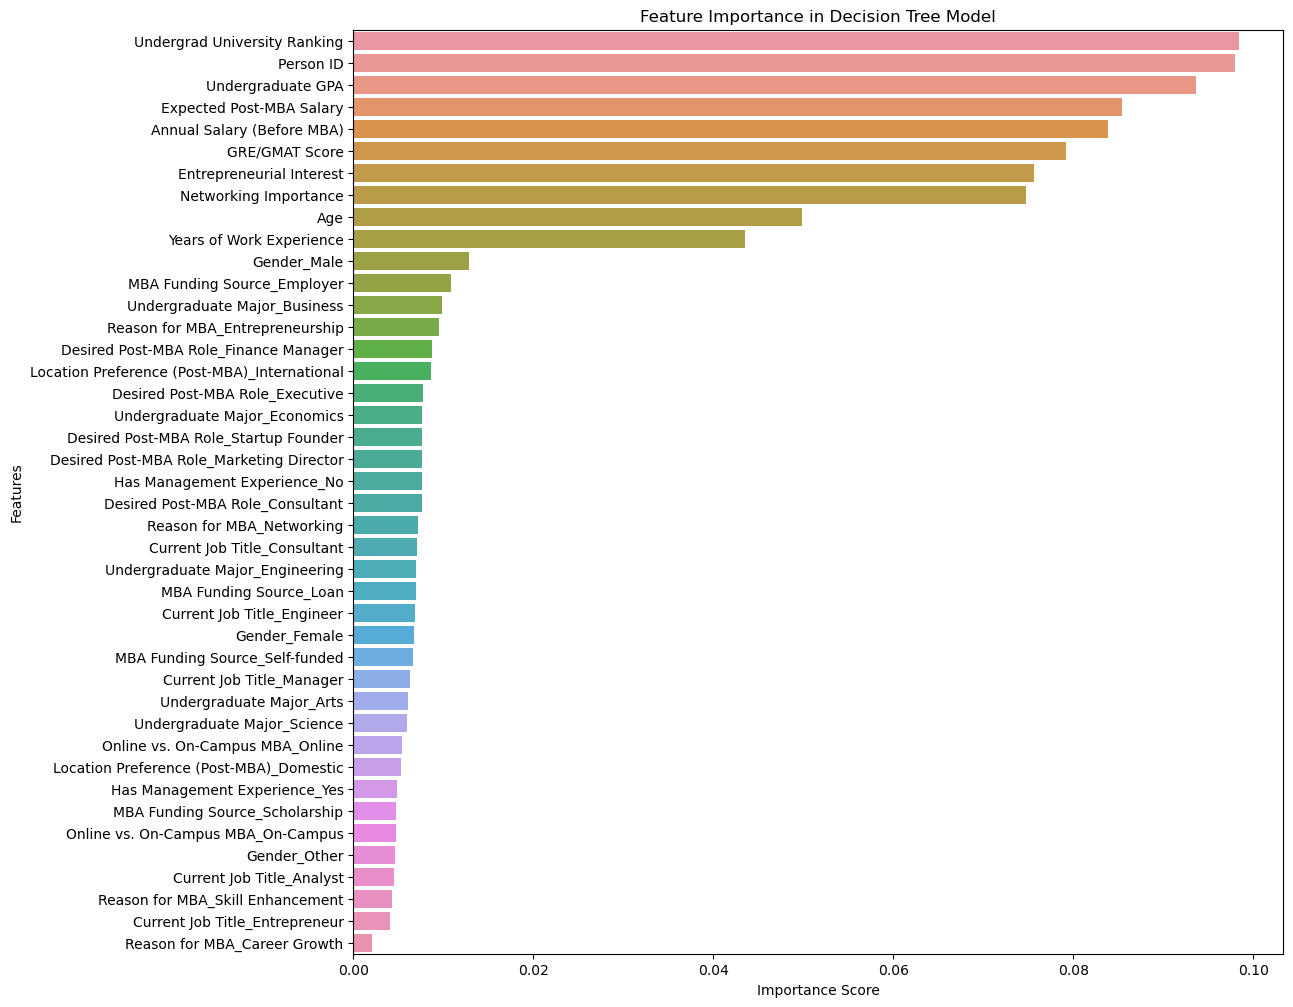

In [17]:
# Plot feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance in Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [18]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(tree_clf5, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.52     0.515625 0.516875 0.50375  0.509375]
Mean Accuracy: 0.5131249999999999
Standard Deviation: 0.005822907349426046


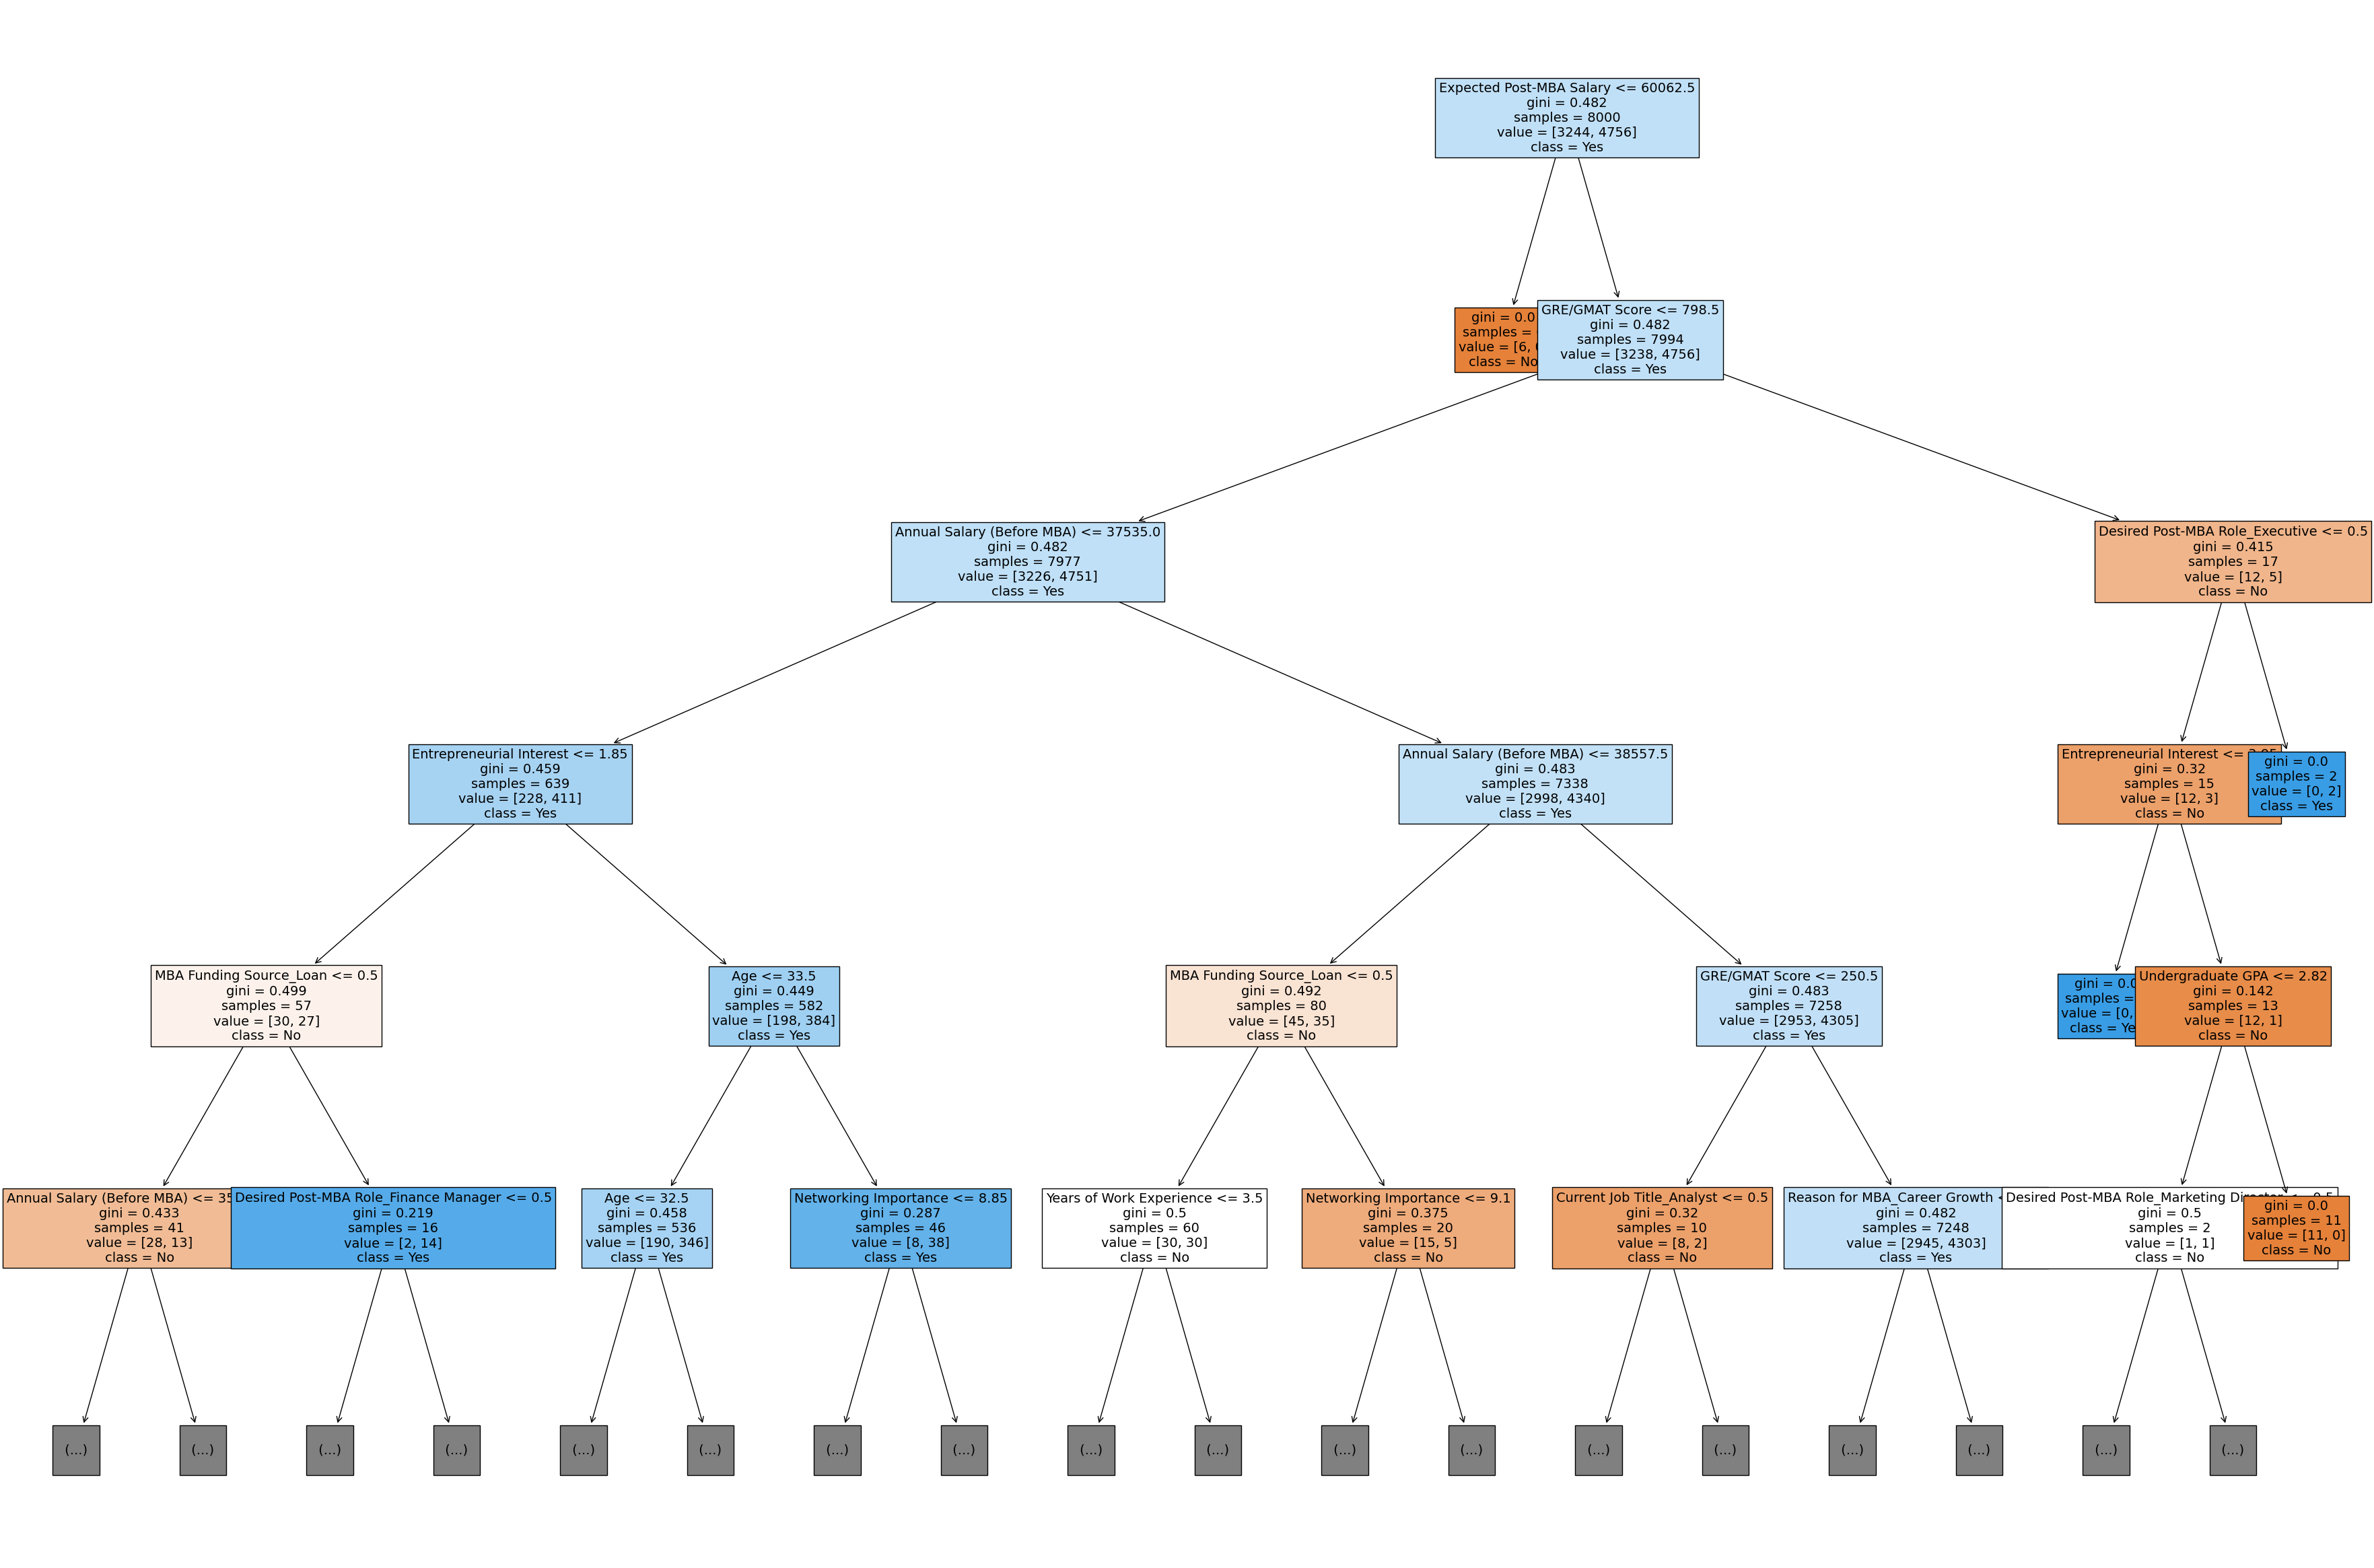

In [19]:
# Assuming you have your training data as X_train and y_train
feature_names = list(X_train.columns)  # Get feature names from the training data
class_names = [str(cls) for cls in set(y_train)]  # Get unique class names as strings


# Plot the decision tree with larger boxes and adjusted font sizes
plt.figure(figsize=(45, 30))  # Make the figure larger
plot_tree(tree_clf5, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True, 
          max_depth=5, 
          fontsize=14,  # Adjust fontsize for text
           # Adjust font size for nodes
          proportion=False)  # Optionally, set this to False for more clear node sizes
plt.show()

##### Optimizing Random Forest

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}

Best Cross-Validation Accuracy: 0.576

Classification Report:
               precision    recall  f1-score   support

          No       0.45      0.08      0.14       849
         Yes       0.58      0.92      0.71      1151

    accuracy                           0.57      2000
   macro avg       0.51      0.50      0.43      2000
weighted avg       0.52      0.57      0.47      2000


Confusion Matrix:
 [[  71  778]
 [  88 1063]]
Feature Importances:
                                          Feature  Importance
6                   Undergrad University Ranking    0.093663
9                       Expected Post-MBA Salary    0.087950
4                     Annual Salary (Before MBA)    0.087225
0                                      Person ID    0.082331
7                       Entrepreneurial Interest    0.080025
8   

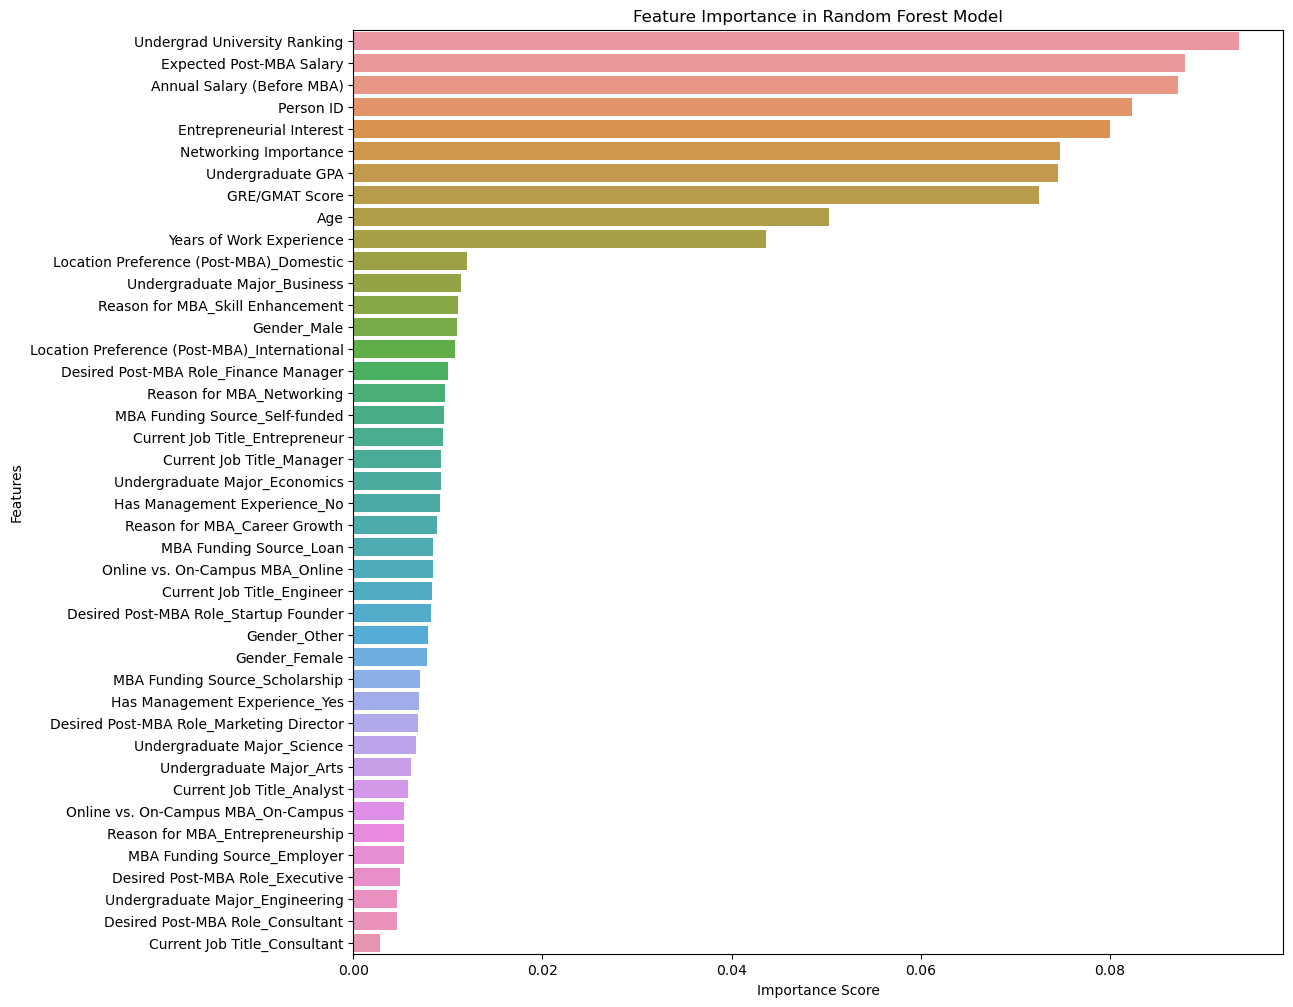

In [20]:
# Specify training, test data, split and x and y for model
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=100, test_size=0.2)

# Define hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize Random Forest Classifier
forest = RandomForestClassifier(random_state=100, n_jobs=-1)

# Perform Grid Search with Cross-Validation (5-Fold)
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_forest = grid_search.best_estimator_

# Create predictions from the best model with test data
ypred = best_forest.predict(X_test)

# Find accuracy
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
cm = confusion_matrix(y_test, ypred)

# Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", grid_search.best_score_)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

# Extract feature importance from the trained best Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is a DataFrame
    'Importance': best_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance values
print("Feature Importances:\n", feature_importance)

# Plot feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

##### Naive Bayes

In [21]:
# Create features and target for each model in this part
# Target is adaptability level
# Features are all other variables in the data set (available in readme file)
features = data1
target = y

# Specify train split random state and target/features for model
X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=100, test_size=.2)

# select classifer for Gaussian
classifier_NB = GaussianNB()

# Create model with classifier and train
model = classifier_NB.fit(X_train, y_train)  

# Create predictions from model with test data
ypred=model.predict(X_test)

# Find accuracy
#create confusion matrix with accuracy for test and predicted values from model
accuracy = accuracy_score(y_test,ypred)
report = classification_report(ypred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")

print(report)
print("Accuracy: ",accuracy)
print("  ")
print("Confusion matrix:")
print(cm)

Classification report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.58      0.73      2000

    accuracy                           0.58      2000
   macro avg       0.50      0.29      0.37      2000
weighted avg       1.00      0.58      0.73      2000

Accuracy:  0.5755
  
Confusion matrix:
[[   0  849]
 [   0 1151]]


C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Optimized Naive Bayes

In [22]:
# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=100, stratify=target
)

# Step 2: Define pipeline for feature selection and Naïve Bayes
pipe_nb = Pipeline([
                    # Scaling (optional for GaussianNB), but matches knn model
    ("feature_selection", SelectKBest(score_func=f_classif)),  # Feature selection
    ("nb", GaussianNB())                              # Naïve Bayes classifier
])

# Step 3: Define the hyperparameter grid
search_space_nb = [
    {
        "feature_selection__k": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Number of features
        "nb__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]      # Variance smoothing for GaussianNB
    }
]

# Step 4: Perform GridSearchCV to optimize features and hyperparameters
grid_search_nb = GridSearchCV(pipe_nb, search_space_nb, cv=5, verbose=0)
grid_search_nb.fit(X_train, y_train)

# Step 5: Retrieve the best parameters
best_k_nb = grid_search_nb.best_estimator_.get_params()["feature_selection__k"]
best_smoothing = grid_search_nb.best_estimator_.get_params()["nb__var_smoothing"]

print(f"Optimal number of features: {best_k_nb}")
print(f"Optimal variance smoothing: {best_smoothing}")

Optimal number of features: 1
Optimal variance smoothing: 1e-09


##### SVM

In [23]:
features= data1
target=y

# Scale features 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Specify train split random state and target/features for model
X_train, X_test, y_train, y_test = train_test_split(
    features_standardized, target, random_state=100, test_size=.2)

# Set params (nonlinear) with gamma scale
clf = SVC(kernel='rbf', C=1E6, gamma='scale')
# Train model with data
clf.fit(X_train, y_train)

# Save predictions of model from test data
ypred4=clf.predict(X_test)
accuracy = accuracy_score(y_test,ypred4)
report = classification_report(ypred4, y_test)
cm = confusion_matrix(y_test, ypred4)


# Check if accuracy has improved from linear model
print("\033[1m Accuracy: ",accuracy)
if accuracy< 0.75:
    print("\033[1m Poor Accuracy")
else:
    print("\033[1m Significantly Improved Accuracy")
print(" \033[0m ")



# Print model report and confusion matrix
print("Classification report:")
print(report)
print("  ")
print("Confusion matrix:")
print(cm)

 Accuracy:  0.525
 Poor Accuracy
  
Classification report:
              precision    recall  f1-score   support

          No       0.40      0.43      0.41       773
         Yes       0.62      0.58      0.60      1227

    accuracy                           0.53      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.53      0.53      0.53      2000

  
Confusion matrix:
[[336 513]
 [437 714]]


In [24]:
# Cross validation
# Scale features 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Specify train split random state and target/features for model
X_train, X_test, y_train, y_test = train_test_split(
    features_standardized, target, random_state=100, test_size=.2)

# Set SVM model parameters (nonlinear with RBF kernel and gamma='scale')
clf = SVC(kernel='rbf', C=1E6, gamma='scale')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Average Cross-Validation Accuracy: ", cv_scores.mean())

# Train model on the entire training set after cross-validation (for evaluation on test set)
clf.fit(X_train, y_train)

# Save predictions of model from test data
ypred4 = clf.predict(X_test)

# Evaluate on the test set
accuracy = accuracy_score(y_test, ypred4)
report = classification_report(y_test, ypred4)
cm = confusion_matrix(y_test, ypred4)

# Check if accuracy has improved from linear model
print("\033[1m Accuracy: ", accuracy)
if accuracy < 0.75:
    print("\033[1m Poor Accuracy")
else:
    print("\033[1m Significantly Improved Accuracy")
print(" \033[0m ")

# Print model report and confusion matrix
print("Classification report:")
print(report)
print("  ")
print("Confusion matrix:")
print(cm)

Cross-Validation Accuracy Scores:  [0.5475   0.514375 0.500625 0.51375  0.505625]
Average Cross-Validation Accuracy:  0.516375
 Accuracy:  0.525
 Poor Accuracy
  
Classification report:
              precision    recall  f1-score   support

          No       0.43      0.40      0.41       849
         Yes       0.58      0.62      0.60      1151

    accuracy                           0.53      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.52      0.53      0.52      2000

  
Confusion matrix:
[[336 513]
 [437 714]]


##### SVM Optimized

In [25]:
# Scale features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, random_state=100, test_size=0.2)

# Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1],  # Try different values of C
    'gamma': ['scale', 'auto'],  # Test different gamma values
    'kernel': ['rbf']  # Using RBF kernel (nonlinear)
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_svm = grid_search.best_estimator_

# Train best model on full training set
best_svm.fit(X_train, y_train)

# Predict on test set
ypred3 = best_svm.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, ypred3)
report = classification_report(y_test, ypred3)
cm = confusion_matrix(y_test, ypred3)

# Display accuracy
print("\033[1m Accuracy: ", accuracy)
if accuracy < 0.75:
    print("\033[1m Poor Accuracy")
else:
    print("\033[1m Significantly Improved Accuracy")
print(" \033[0m ")

# Print model report and confusion matrix
print("Best Parameters:", grid_search.best_params_)
print("\nClassification report:")
print(report)
print("\nConfusion matrix:")
print(cm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
 Accuracy:  0.5755
 Poor Accuracy
  
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00       849
         Yes       0.58      1.00      0.73      1151

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.33      0.58      0.42      2000


Confusion matrix:
[[   0  849]
 [   0 1151]]


C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### XG Boost 

In [26]:



# Convert target labels from 'Yes'/'No' to 1/0
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)  # Converts 'No'->0, 'Yes'->1

# Balance dataset if necessary
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(features, target)

# Split data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6250528988573847
              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1171
           1       0.59      0.81      0.69      1192

    accuracy                           0.63      2363
   macro avg       0.64      0.62      0.61      2363
weighted avg       0.64      0.63      0.61      2363



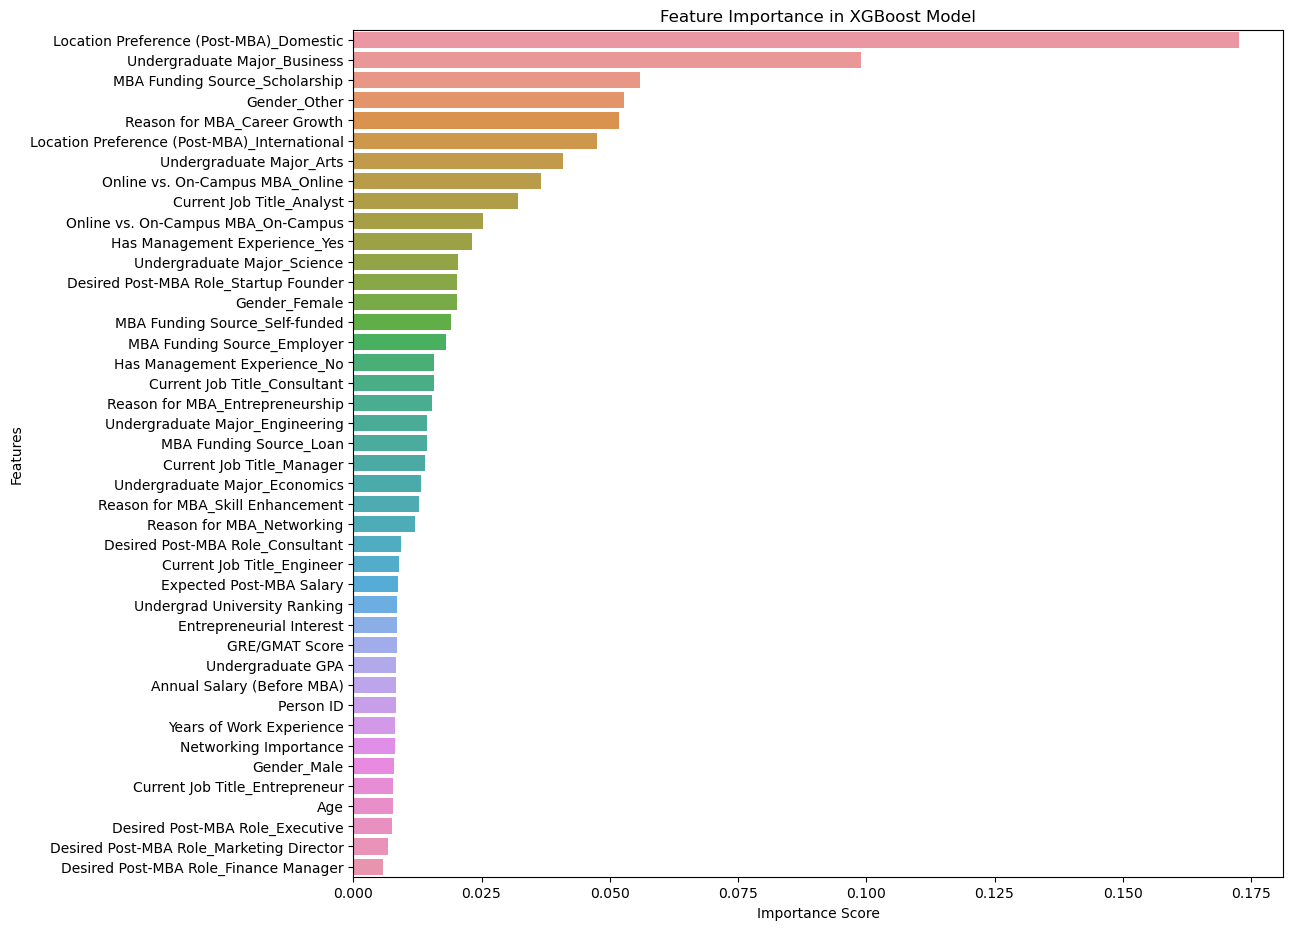

In [48]:

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Convert to DataFrame for readability
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,11))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.savefig('feature_importance_xgboost.png', format='png')

plt.show()




In [38]:
importance_df

,Feature,Importance
34,Location Preference (Post-MBA)_Domestic,0.172653
14,Undergraduate Major_Business,0.099051
27,MBA Funding Source_Scholarship,0.055944
12,Gender_Other,0.052784
36,Reason for MBA_Career Growth,0.051751
35,Location Preference (Post-MBA)_International,0.047440
13,Undergraduate Major_Arts,0.040864
41,Online vs. On-Campus MBA_Online,0.036502
18,Current Job Title_Analyst,0.032098
40,Online vs. On-Campus MBA_On-Campus,0.025310


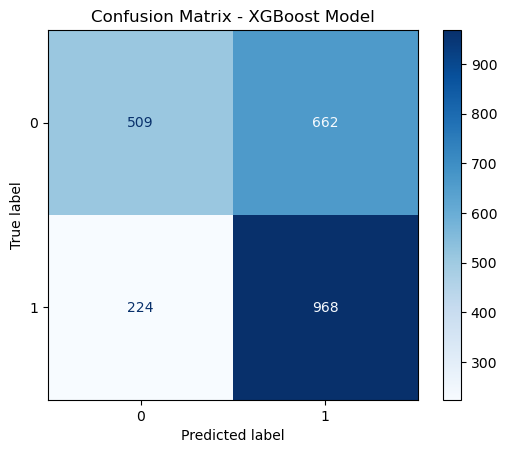

In [28]:
# Compute confusion matrix for XGBoost model
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")

# Show plot
plt.title("Confusion Matrix - XGBoost Model")
plt.show()

In [29]:
import xgboost as xgb
from graphviz import Source

# Export the tree to DOT format
dot_data = xgb.to_graphviz(xgb_model, num_trees=0)

# Modify the DOT string to ensure the graph is square-shaped by adjusting the ratio
dot_str = dot_data.source

# Set the ratio to 1 to make the graph square-shaped
dot_str = dot_str.replace('graph [', 'graph [ratio=1,')  # Enforces a square layout

# Create a new Source object with the modified DOT string
modified_dot_data = Source(dot_str)

# Render and save the tree as a PNG image and view it
modified_dot_data.render("xgboost_tree_square", format='png', view=True)


'xgboost_tree_square.png'

In [30]:
# Cross validate

from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Convert target labels from 'Yes'/'No' to 1/0
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)  # Converts 'No'->0, 'Yes'->1

# Balance dataset if necessary
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(features, target)

# Split data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

# Fit the model to the entire training data
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Test Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


Cross-Validation Accuracy Scores: [0.62453728 0.62910053 0.62433862 0.62592593 0.62910053]
Average Cross-Validation Accuracy: 0.6266005780654114
XGBoost Test Accuracy: 0.6250528988573847
              precision    recall  f1-score   support

           0       0.69      0.43      0.53      1171
           1       0.59      0.81      0.69      1192

    accuracy                           0.63      2363
   macro avg       0.64      0.62      0.61      2363
weighted avg       0.64      0.63      0.61      2363



##### KNN

In [31]:

# set x and y for model
features = data1
target = y

# Split data to training and testing sets and select size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                    random_state=100, stratify=target)
# select standardizer
standardizer = MinMaxScaler()

# Set KNN with classifier
knn = KNeighborsClassifier(n_jobs=-1)

# Add feature selection step to pipeline
pipe = Pipeline([
    ("standardizer", standardizer),
    ("feature_selection", SelectKBest(score_func=f_classif)),  # Feature selection
    ("knn", knn)
])

# Consider 10 different values of K (neighbors) and number of features
# The original search space was much wider, after initial run I shortened it to run faster for future iterations
search_space = [
    {
        "feature_selection__k": [ 1,2,3,4,5,6,7,8],  # Number of features
        "knn__n_neighbors": [1,2,3,5]       # Number of neighbors
    }
]

# Create search with parameters and set 5-fold cross-validation
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_train, y_train)

# Calculate best number of features and neighbors
best_k = classifier.best_estimator_.get_params()["feature_selection__k"]
best_n_neighbors = classifier.best_estimator_.get_params()["knn__n_neighbors"]

print(f"Optimal number of features: {best_k}")
print(f"Optimal number of neighbors: {best_n_neighbors}")


Optimal number of features: 2
Optimal number of neighbors: 3


In [32]:
# Retrieve the fitted pipeline with the best parameters
best_pipeline = classifier.best_estimator_

# Extract the SelectKBest step from the pipeline
select_kbest = best_pipeline.named_steps["feature_selection"]

# Get the mask of selected features (True for selected features)
selected_mask = select_kbest.get_support()

# Retrieve the names of the selected features
selected_features = features.columns[selected_mask]

print("Features selected for the kNN model:")
print(selected_features.tolist())

Features selected for the kNN model:
['Desired Post-MBA Role_Marketing Director', 'Reason for MBA_Career Growth']


In [33]:
# Retrieve the best pipeline from the grid search
best_pipeline = classifier.best_estimator_

# Transform the training and testing data with the optimal features
X_train_selected = best_pipeline.named_steps["feature_selection"].transform(X_train)
X_test_selected = best_pipeline.named_steps["feature_selection"].transform(X_test)

# Initialize a kNN model with the optimal number of neighbors
final_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, n_jobs=-1)

# Get the best KNN model from GridSearchCV
best_knn = classifier.best_estimator_

# Make predictions on the test set using the best KNN model
y_pred_knn = best_knn.predict(X_test)

# Generate and display the classification report
knn_report = classification_report(y_test, y_pred_knn)
print("\nClassification Report for Best KNN Model:\n", knn_report)

C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(



Classification Report for Best KNN Model:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00       819
         Yes       0.59      1.00      0.74      1181

    accuracy                           0.59      2000
   macro avg       0.30      0.50      0.37      2000
weighted avg       0.35      0.59      0.44      2000



C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


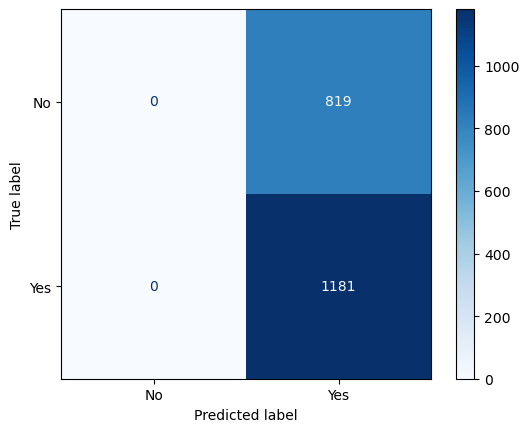

In [34]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Use np.unique(y_test) to get class labels dynamically
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")

# Show plot
plt.show()

## Assessing Gender Bias

##### XG Boost

In [35]:
# Ensure X_train and X_test remain DataFrames, not NumPy arrays
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Store gender separately before dropping it for training
X_test_with_gender = X_test.copy()

# Ensure "Gender" is available for bias analysis
X_test_with_gender["Gender"] = df.loc[X_test_with_gender.index, "Gender"]

# Make predictions
X_test_with_gender["Predicted_Pursue_MBA"] = xgb_model.predict(X_test)

# Analyze bias by gender
gender_bias_check = X_test_with_gender.groupby("Gender")["Predicted_Pursue_MBA"].mean()

# Display results
print(gender_bias_check)

# Compute Disparate Impact (DI) Ratio
male_rate = gender_bias_check.get("Male", 1)  # Default to 1 to avoid division errors
female_rate = gender_bias_check.get("Female", 1)
disparate_impact = female_rate / male_rate

# Display results
print("\nPredicted MBA Pursuit Rates by Gender (%):\n", gender_bias_check)
print(f"\nDisparate Impact Ratio: {disparate_impact:.2f}")

Gender
Female    0.729673
Male      0.728601
Other     0.768421
Name: Predicted_Pursue_MBA, dtype: float64

Predicted MBA Pursuit Rates by Gender (%):
 Gender
Female    0.729673
Male      0.728601
Other     0.768421
Name: Predicted_Pursue_MBA, dtype: float64

Disparate Impact Ratio: 1.00


#### SVM

In [36]:
# Ensure X_test is a DataFrame before adding Gender back
X_test_with_gender = pd.DataFrame(X_test, columns=features.columns)

# Restore Gender column from the original dataset
if "Gender" in df.columns:
    X_test_with_gender["Gender"] = df.loc[X_test_with_gender.index, "Gender"]

    # If Gender is encoded, map back to Male/Female
    gender_map = {0: "Male", 1: "Female"}
    if X_test_with_gender["Gender"].dtype in [np.int64, np.float64]:  
        X_test_with_gender["Gender"] = X_test_with_gender["Gender"].map(gender_map)

    # Add model predictions
    X_test_with_gender["Predicted_Pursue_MBA"] = ypred4  # SVM predictions

    # Convert 'Yes'/'No' to 1/0 for calculations
    X_test_with_gender["Predicted_Pursue_MBA"] = X_test_with_gender["Predicted_Pursue_MBA"].map({'Yes': 1, 'No': 0})

    # Calculate % of MBA pursuit predictions by gender
    gender_bias_check = X_test_with_gender.groupby("Gender")["Predicted_Pursue_MBA"].mean() * 100

    # Compute Disparate Impact (DI) Ratio safely
    male_rate = gender_bias_check.get("Male", gender_bias_check.mean())  
    female_rate = gender_bias_check.get("Female", gender_bias_check.mean())  
    disparate_impact = female_rate / male_rate

    # Display results
    print("\nPredicted MBA Pursuit Rates by Gender (%):\n", gender_bias_check)
    print(f"\nDisparate Impact Ratio: {disparate_impact:.2f}")


Predicted MBA Pursuit Rates by Gender (%):
 Gender
Female    61.774023
Male      60.438413
Other     66.315789
Name: Predicted_Pursue_MBA, dtype: float64

Disparate Impact Ratio: 1.02


##### KNN

In [37]:
# Ensure X_test is a DataFrame before adding Gender back
X_test_with_gender = pd.DataFrame(X_test, columns=features.columns)

# Restore Gender column from the original dataset
if "Gender" in df.columns:
    X_test_with_gender["Gender"] = df.loc[X_test_with_gender.index, "Gender"]

    # If Gender is encoded, map back to Male/Female
    gender_map = {0: "Male", 1: "Female"}
    if X_test_with_gender["Gender"].dtype in [np.int64, np.float64]:  
        X_test_with_gender["Gender"] = X_test_with_gender["Gender"].map(gender_map)

    # Add model predictions
    X_test_with_gender["Predicted_Pursue_MBA"] = best_knn.predict(X_test)

    # Convert 'Yes'/'No' to 1/0 for calculations if necessary
    if X_test_with_gender["Predicted_Pursue_MBA"].dtype == object:
        X_test_with_gender["Predicted_Pursue_MBA"] = X_test_with_gender["Predicted_Pursue_MBA"].map({'Yes': 1, 'No': 0})

    # Calculate % of MBA pursuit predictions by gender
    gender_bias_check = X_test_with_gender.groupby("Gender")["Predicted_Pursue_MBA"].mean() * 100

    # Compute Disparate Impact (DI) Ratio safely
    male_rate = gender_bias_check.get("Male", gender_bias_check.mean())  
    female_rate = gender_bias_check.get("Female", gender_bias_check.mean())  
    disparate_impact = female_rate / male_rate

    # Display results
    print("\nPredicted MBA Pursuit Rates by Gender (%):\n", gender_bias_check)
    print(f"\nDisparate Impact Ratio: {disparate_impact:.2f}")


Predicted MBA Pursuit Rates by Gender (%):
 Gender
Female    100.0
Male      100.0
Other     100.0
Name: Predicted_Pursue_MBA, dtype: float64

Disparate Impact Ratio: 1.00
